In [1]:
import pandas as pd
import numpy as np
import pingouin as pg

In [6]:
data = pd.read_csv('2023studentdata.csv')

In [14]:
print(f"The dataset has {len(data)} rows and {len(data.columns)} columns.")
print(f"The columns are as following:")
i = 0
for column in list(data.columns):
    print(str(i) + "." + column)
    i = i+1


The dataset has 71 rows and 38 columns.
The columns are as following:
0.Vastuse ID
1.Sugu 
2.Kõike kokku võttes, kuivõrd rahul sa oma eluga üldiselt oled praegu?
3.Olen võimeline kohanema muutuste korral.
4.Olen võimeline tegelema kõigega, mis seisab mu teel ees.
5.Ma proovin näha probleemidega silmitsi seistes ka humoorikamat poolt.
6.Stressiga toimetulek võib muuta mind tugevamaks.
7.Ma taastun kiirelt ning mind ei heiduta haigused, vigastused või raskused.
8.Usun, et olen võimeline saavutama oma eesmärke, isegi kui teel on takistusi.
9.Ma suudan keskenduda ja mõelda selgelt ka surve all.
10.Ebaõnnestumised ei heiduta mind kergelt.
11.Ma mõtlen endast kui tugevast inimesest, kui ma seisan silmitsi elu väljakutsete ja ülesannetega.
12.Olen võimeline talitsema ebameeldivaid tundeid nagu näiteks kurbus, hirm ja viha.
13.Ma kardan, et teised inimesed kogevad rohkem meelepäraseid elamusi kui mina. 
14.Ma kardan, et minu sõbrad kogevad rohkem meelepäraseid elamusi kui mina. 
15.Ma muutun m

# What is this data
Here we have 38 variables of which some are multi-item instruments. The instruments in this study are:
1. **Life satisfaction**. 1 item, column index 2
2. **Resilience**. 10 items, index 3 to 12
3. **Fomo**. 10 items, index 13 to 22
4. **Persistence**. 7 items, most reverse-coded, index 23 to 29
5. **Test axiety** or math test anxiety. 7 items, index 30 to 36
6. **GPA** of first semester

In [19]:
round(data.describe(include='all'),2)

,Vastuse ID,Sugu,"Kõike kokku võttes, kuivõrd rahul sa oma eluga üldiselt oled praegu?",Olen võimeline kohanema muutuste korral.,"Olen võimeline tegelema kõigega, mis seisab mu teel ees.",Ma proovin näha probleemidega silmitsi seistes ka humoorikamat poolt.,Stressiga toimetulek võib muuta mind tugevamaks.,"Ma taastun kiirelt ning mind ei heiduta haigused, vigastused või raskused.","Usun, et olen võimeline saavutama oma eesmärke, isegi kui teel on takistusi.",Ma suudan keskenduda ja mõelda selgelt ka surve all.,...,"Keerulisele ülesandele sattudes tegelen sellega seni kuni mulle tundub, et olen selle lahendanud.",Keerulisele ülesandele sattudes annan ma tavaliselt alla ja lähen edasi järgmise ülesandega.,"Kontrolltööd tehes on mul tunne, et olen teistest kehvem.","Kontrolltööd tehes mõtlen jätkuvalt küsimustele, millele eelnevalt vastata ei osanud.","Kontrolltööd tehes mõtlen, mis saab siis, kui see ebaõnnestub.",Kontrolltööd tehes tunnen end närvilisena ja muretsen.,"Kontrolltööd tehes tunnen, et mu süda lööb kiiremini.\t",Kontrolltööd tehes on mu pea täiesti tühi ja ma ei mäleta varem õpitut.,"Ma ei suuda magada enne kontrolltöö sooritamist, sest olen liiga pinges.",Kaalutud keskmine hinne eelmisel semestril (04.09.2023 - 11.02.2024)üle kõigi tulemuste
count,71.00,71,71.00,71,71,71,70,71,71,71,...,71,71,71,70,71,71,71,71,71,70.00
unique,NaN,3,NaN,4,4,5,4,5,4,5,...,4,4,5,5,5,5,5,5,5,NaN
top,NaN,Mees,NaN,Tihti tõsi,Tihti tõsi,Peaaegu alati tõsi,Tihti tõsi,Tihti tõsi,Tihti tõsi,Tihti tõsi,...,Pigem nõustun,Pigem ei nõustu,Nii ja naa,Pigem nõustun,Ei nõustu üldse,Pigem nõustun,Pigem ei nõustu,Pigem ei nõustu,Ei nõustu üldse,NaN
freq,NaN,47,NaN,45,34,24,30,26,38,26,...,50,33,19,23,21,17,17,26,28,NaN
mean,678.99,NaN,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.72
std,96.13,NaN,1.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99
min,533.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.20
25%,598.50,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00
50%,678.00,NaN,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00
75%,731.00,NaN,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50


In [ ]:
data.head(10)

We see that most of the data is in text form that needs to be translated into numbers to run some calculations.

# Translate some likert scale replies to numbers


1. **Life satisfaction**. 1 item, column index 2
2. **Resilience**. 10 items, index 3 to 12
3. **Fomo**. 10 items, index 13 to 22
4. **Persistence**. 7 items, most reverse-coded, index 23 to 29
5. **Test axiety** or math test anxiety. 7 items, index 30 to 36
6. **GPA** of first semester

In [25]:
#dictionaries to map scale texts to numbers
resilience_replacer = {'Mitte kunagi tõsi':1,
                       'Harva tõsi':2,
                       'Mõnikord tõsi':3,
                       'Tihti tõsi':4,
                       'Peaaegu alati tõsi':5}

fomo_replacer = {'pole üldse tõene': 1,
                 'veidi tõene': 2,
                 'keskmiselt tõene': 3,
                 'väga tõene': 4,
                 'eriti tõene':5}

persistence_replacer = {'Ei nõustu üldse': 1,
                        'Pigem ei nõustu': 2,
                        'Ei oska öelda': 3,
                        'Pigem nõustun':4,
                        'Nõustun täielikult':5}

testanx_replacer = {'Ei nõustu üldse': 1,
                    'Pigem ei nõustu': 2,
                    'Nii ja naa': 3,
                    'Pigem nõustun':4,
                    'Nõustun täielikult':5}

In [27]:
data.columns[30:37]

Index(['Kontrolltööd tehes on mul tunne, et olen teistest kehvem.',
       'Kontrolltööd tehes mõtlen jätkuvalt küsimustele, millele eelnevalt vastata ei osanud.',
       'Kontrolltööd tehes mõtlen, mis saab siis, kui see ebaõnnestub.',
       'Kontrolltööd tehes tunnen end närvilisena ja muretsen. ',
       'Kontrolltööd tehes tunnen, et mu süda lööb kiiremini.\t ',
       'Kontrolltööd tehes on mu pea täiesti tühi ja ma ei mäleta varem õpitut.',
       'Ma ei suuda magada enne kontrolltöö sooritamist, sest olen liiga pinges.'],
      dtype='object')

In [28]:
# a loop to replace resilience items
i = 1
for column in list(data.columns[3:13]):
    #items are named rs for resilience
    name = 'rs' + str(i)
    #create new columns according to the dictionary
    data[name] = data[column].map(resilience_replacer)
    i = i + 1

#a loop to replace fomo items
i = 1
for column in list(data.columns[13:23]):
    #items are named fm for fomo
    name = 'fm' + str(i)
    #create new columns according to the dictionary
    data[name] = data[column].map(fomo_replacer)
    i = i + 1

#a loop to replace persistence items
i = 1
for column in list(data.columns[23:30]):
    name = 'ps'+ str(i)
    data[name] = data[column].map(persistence_replacer)
    i = i + 1

#a loop to replace testanxiety items
i = 1
for column in list(data.columns[30:37]):
    name = 'ta'+ str(i)
    data[name] = data[column].map(testanx_replacer)
    i = i + 1


In [61]:
data.columns

Index(['Vastuse ID', 'Sugu ',
       'Kõike kokku võttes, kuivõrd rahul sa oma eluga üldiselt oled praegu?',
       'Olen võimeline kohanema muutuste korral.',
       'Olen võimeline tegelema kõigega, mis seisab mu teel ees.',
       'Ma proovin näha probleemidega silmitsi seistes ka humoorikamat poolt.',
       'Stressiga toimetulek võib muuta mind tugevamaks.',
       'Ma taastun kiirelt ning mind ei heiduta haigused, vigastused või raskused.',
       'Usun, et olen võimeline saavutama oma eesmärke, isegi kui teel on takistusi.',
       'Ma suudan keskenduda ja mõelda selgelt ka surve all.',
       'Ebaõnnestumised ei heiduta mind kergelt.',
       'Ma mõtlen endast kui tugevast inimesest, kui ma seisan silmitsi elu väljakutsete ja ülesannetega.',
       'Olen võimeline talitsema ebameeldivaid tundeid nagu näiteks kurbus, hirm ja viha.',
       'Ma kardan, et teised inimesed kogevad rohkem meelepäraseid elamusi kui mina. ',
       'Ma kardan, et minu sõbrad kogevad rohkem meelepärase

The columns with numerical values for the instrument are at the end of the columnslist.

# Calculate Cronbachs and draw some correlation tables for the instruments

In [43]:
#create smaller datasets for each instrument
resilience = data.iloc[:,38:48]
fomo = data.iloc[:,48:58]
persistence = data.iloc[:,58:65]
testanx = data.iloc[:,65:72]

In [50]:

#calculate all the alphas
rs_alpha = pg.cronbach_alpha(data=resilience)
fm_alpha = pg.cronbach_alpha(data = fomo)
ps_alpha = pg.cronbach_alpha(data = persistence)
ta_alpha = pg.cronbach_alpha(data = testanx)

#print all the alphas
print(f"Cronbach's alpha for the resilience instrument is {rs_alpha[0]} and the 95% confidence interval is {rs_alpha[1]}")
print(f"Cronbach's alpha for the fomo instrument is {fm_alpha[0]} and the 95% confidence interval is {fm_alpha[1]}")
print(f"Cronbach's alpha for the persistence instrument is {ps_alpha[0]} and the 95% confidence interval is {ps_alpha[1]}")
print(f"Cronbach's alpha for the test anxiety instrument is {ta_alpha[0]} and the 95% confidence interval is {ta_alpha[1]}")

Cronbach's alpha for the resilience instrument is 0.8103572992002154 and the 95% confidence interval is [0.737 0.87 ]
Cronbach's alpha for the fomo instrument is 0.8017580872011252 and the 95% confidence interval is [0.725 0.864]
Cronbach's alpha for the persistence instrument is 0.3823929878308232 and the 95% confidence interval is [0.135 0.579]
Cronbach's alpha for the test anxiety instrument is 0.8675170687921001 and the 95% confidence interval is [0.814 0.91 ]


<AxesSubplot:>

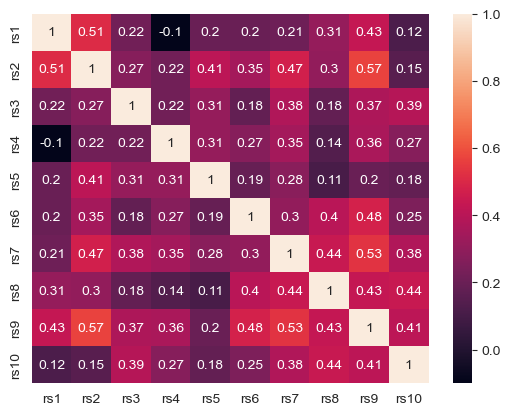

In [82]:
#lets look at the correlations between items
rs_corr = resilience.corr()
rs_corr = round(rs_corr,2)
colored_rs_corr = sns.heatmap(rs_corr, annot = True);
colored_rs_corr

**All is good except the persistence instrument which requires some recoding.**

In [53]:
#look at the items
data.columns[23:30]

Index(['Kui mul on millegi mõistmisega raskusi, tegelen sellega niikaua, kuni saan aru.',
       'Ma püüan ülesandeid lahendada võimalikult kiiresti, ilma et kontrolliksin oma täpsust.',
       'Kui mul on ülesande lahendamisega raskusi, püüan pigem vastuse ära arvata, kui et uurin näiteülesandeid püüdmaks asjadest aru saada.',
       'Kui mul on raskusi ülesande lahendamisega, püüan leida kedagi teist minu eest seda lahendama.',
       'Kui ma loen midagi, millest ma aru ei saa, jätan ma selle vahele ning loodan, et see seletatakse tunnis (loengus).',
       'Keerulisele ülesandele sattudes tegelen sellega seni kuni mulle tundub, et olen selle lahendanud.',
       'Keerulisele ülesandele sattudes annan ma tavaliselt alla ja lähen edasi järgmise ülesandega.'],
      dtype='object')

In [57]:
#create new items from the ones we have with ps2 to ps5 and ps7 turned and ps1 and ps 6 left the same
data['ps1_'] = data['ps1']
data['ps2_'] = 6 - data['ps2']
data['ps3_'] = 6 - data['ps3']
data['ps4_'] = 6 - data['ps4']
data['ps5_'] = 6 - data['ps5']
data['ps6_'] = data['ps6']
data['ps7_'] = 6 - data['ps7']

In [60]:
#look at the new cronbach alpha
persistence_ = data.iloc[:,72:79]

ps_alpha_ = pg.cronbach_alpha(data = persistence_)
print(f"Cronbach's alpha for the turned and fixed persistence instrument is {ps_alpha_[0]} and the 95% confidence interval is {ps_alpha_[1]}")

Cronbach's alpha for the turned and fixed persistence instrument is 0.7706664456844006 and the 95% confidence interval is [0.679 0.844]


Now we have a Cronbach's alpha of 0.77, previously it was 0.38. Iz good! We did good.

<AxesSubplot:>

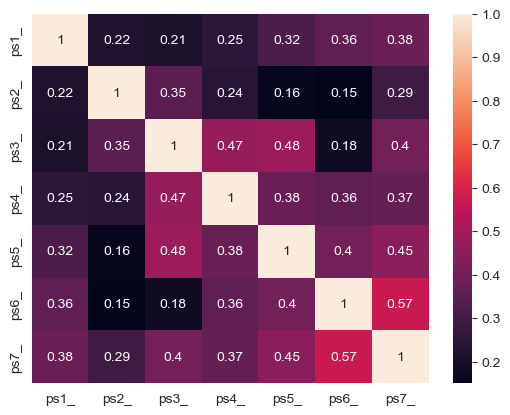

In [81]:
#lets look at the correlations between items
ps_corr = persistence_.corr()
ps_corr = round(ps_corr,2)
colored_ps_corr = sns.heatmap(ps_corr, annot = True);
colored_ps_corr

## Factor analysis of the instruments

In [67]:
from factor_analyzer import FactorAnalyzer #we're going to do and report a factor analysis of the instrument

In [72]:
fa1 = FactorAnalyzer(n_factors = 1, rotation = None, method = 'ml')
fa2 = FactorAnalyzer(n_factors = 2, rotation = None, method = 'ml')

In [68]:
#relisience instrument with one factor
fa_resilience_1 = fa1.fit(resilience)
fa_resilience_1.loadings_

array([[0.47354498],
       [0.67679054],
       [0.48315541],
       [0.40247991],
       [0.38682521],
       [0.53969419],
       [0.67769898],
       [0.55179284],
       [0.80994312],
       [0.49828608]])

In [70]:
#relisience instrument with two factors
fa_resilience_2 = fa2.fit(resilience)
fa_resilience_2.loadings_

array([[ 0.53561077, -0.00417467],
       [ 0.96042773, -0.13542882],
       [ 0.34179581,  0.37462037],
       [ 0.27160558,  0.33747953],
       [ 0.43001593,  0.06561765],
       [ 0.41121307,  0.32822938],
       [ 0.54643218,  0.42013916],
       [ 0.38009447,  0.45874645],
       [ 0.65422653,  0.418549  ],
       [ 0.2477127 ,  0.63557191]])

In [73]:
#fomo instrument with one factor
fa_fomo_1 = fa1.fit(fomo)
fa_fomo_1.loadings_

array([[-0.63796325],
       [-0.68845715],
       [-0.75559997],
       [-0.6514094 ],
       [-0.50705045],
       [-0.36212443],
       [-0.64488445],
       [-0.06871812],
       [-0.63796915],
       [-0.36107578]])

In [74]:
#fomo instrument with two factors
fa_fomo_2 = fa2.fit(fomo)
fa_fomo_2.loadings_

array([[ 0.79351501, -0.34391399],
       [ 0.83535999, -0.28168159],
       [ 0.66542158,  0.23154101],
       [ 0.56656408,  0.24334004],
       [ 0.43858105,  0.24113669],
       [ 0.31943636,  0.13162183],
       [ 0.60149789,  0.48700991],
       [ 0.07333618,  0.08388545],
       [ 0.59499329,  0.46599662],
       [ 0.30411239,  0.11234069]])

In [76]:
#persistence instrument with one factor
fa_persistence_1 = fa1.fit(persistence_)#hmm kas siin peaks olema pööratud või pööramata?
fa_persistence_1.loadings_

array([[-0.49384298],
       [-0.3734518 ],
       [-0.57820975],
       [-0.5784794 ],
       [-0.64502937],
       [-0.62790144],
       [-0.74445457]])

In [77]:
#persistence instrument with two factors
fa_persistence_2 = fa2.fit(persistence_)#hmm kas siin peaks olema pööratud või pööramata?
fa_persistence_2.loadings_

array([[ 0.21733687,  0.45024227],
       [ 0.3500587 ,  0.16025218],
       [ 0.99745921, -0.00868652],
       [ 0.4694397 ,  0.33259224],
       [ 0.48136137,  0.40961043],
       [ 0.19124146,  0.7538269 ],
       [ 0.40551875,  0.64026672]])

In [78]:
#text anxiety instrument with one factor
fa_testanx_1 = fa1.fit(testanx)
fa_testanx_1.loadings_

array([[-0.69016933],
       [-0.60891377],
       [-0.80311292],
       [-0.88086268],
       [-0.73224387],
       [-0.56960061],
       [-0.57077468]])

In [79]:
#text anxiety instrument with two factors
fa_testanx_2 = fa2.fit(testanx)
fa_testanx_2.loadings_

array([[ 0.69753535,  0.4372486 ],
       [ 0.5844781 , -0.07437134],
       [ 0.78582613,  0.05413661],
       [ 0.9237605 , -0.19140588],
       [ 0.73340122, -0.08189657],
       [ 0.57543657,  0.50167995],
       [ 0.56590427,  0.06555083]])